In [ ]:
from __future__ import print_function
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import io
import re
from matplotlib.font_manager import FontProperties  # 匯入FontProperties
import matplotlib as mpl
from matplotlib.font_manager import fontManager
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2022-01-26 06:47:37--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.6.139, 142.251.6.101, 142.251.6.113, ...
Connecting to drive.google.com (drive.google.com)|142.251.6.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jbpds2g1hrnt2on4af5tb0p2pvrdnbnk/1643179650000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2022-01-26 06:47:42--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jbpds2g1hrnt2on4af5tb0p2pvrdnbnk/1643179650000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.251.6.132, 2607:f8b0:4001:c5a::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|142.251.6.1

# 載入檔案


In [ ]:
import gdown
import pandas as pd
import os

!gdown --id '1YeeYOrWMJ2f0VGGSdjrQNJqR28VOb4Z6' --output data.zip
# !wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!unzip 'data.zip'

Downloading...
From: https://drive.google.com/uc?id=1YeeYOrWMJ2f0VGGSdjrQNJqR28VOb4Z6
To: /content/data.zip
100% 410M/410M [00:03<00:00, 103MB/s] 
Archive:  data.zip
   creating: 人民日報/
  inflating: 人民日報/1958_jieba.xlsx  
  inflating: 人民日報/1959_jieba.xlsx  
  inflating: 人民日報/1960_jieba.xlsx  
  inflating: 人民日報/1961_jieba.xlsx  
  inflating: 人民日報/1962_jieba.xlsx  


In [ ]:
year=[1958,1959,1960,1961,1962]

path="人民日報" 
kw=['大跃进', '人民公社', '总路线', '三面红旗', '超英赶美',]
title="大跃进"

In [ ]:
#### 含有 kw 的方保留
method="para"



import re
import pandas as pd
sentences=[]
years=[]
filenames=[]
titles=[]
words=[]
count=[]
rate=[]
ye=[]
era=[]


for n in range(len(year)):
    tok=""
    i=0
    # 未斷詞
    fname=str(year[n])+"_jieba.xlsx"
    df=pd.read_excel(path+"/"+fname, 0)      
    con=df.token.str.replace("    ","\n")
    
    # 有斷詞
    # fname=str(year[n])+"_jieba.xlsx"
    # df=pd.read_excel(path+"人民日報_jieba/"+fname, 0)    
    # con=df.token
    
    # 增加分段符號 \n
    con=con.str.replace("：一、","：\n一、")
    con=con.str.replace("。二、","。\n二、")
    con=con.str.replace("。三、","。\n三、")
    con=con.str.replace("。四、","。\n四、")
    con=con.str.replace("。五、","。\n五、")
    con=con.str.replace("。六、","。\n六、")
    con=con.str.replace("。七、","。\n七、")
    con=con.str.replace("。八、","。\n八、")
    con=con.str.replace("。九、","。\n九、")
    con=con.str.replace("。十、","。\n十、")
    con=con.str.replace("：1.","：\n1.")
    con=con.str.replace("。2.","。\n2.")
    con=con.str.replace("。3.","。\n3.")
    con=con.str.replace("。4.","。\n4.")    
    con=con.str.replace("。5.","。\n5.")    
    con=con.str.replace("。6.","。\n6.")    
    con=con.str.replace("。7.","。\n7.")  
    con=con.str.replace("。8.","。\n8.")
    con=con.str.replace("。9.","。\n9.")
    con=con.str.replace("。10.","。\n10.")
    con_list=list(con)  
    
    # 分析單元：文章，段落，句子，前後字詞
    for t in range(len(con_list)):
        if type(con_list[t])== str:
            if method=="para":
                # 如果是段落
                sent=re.split('[\n]',con_list[t])   
            elif method=="sent":
                # 如果是句子        
                sent=re.split('[？！：。\n]',con_list[t])
            elif method=="arti":    
                # 以文章為單位
                sent=[con_list[t]]
                
            if method in ["sent","para","arti"]:
                if len(sent)>0:
                    for s in sent:
                        for k in kw:
                            if s.find(k)>0:          
                                sentences.append(s)
                                years.append(year[n])
                                era.append(df.era[t])
                                titles.append(df.title[t])
                                filenames.append(df.filename[t])
                                i+=1                            
                                break  
            else:
                # 以前後字詞為單位
                d=df.filename[t]
                s= con_list[t]
                for k in kw:
                    s=s.replace(k,"【"+k+"】")
                    # 點的數目代表前後的字數
                    pattern='...............'+k+'...............'
                    string="re.compile(r'"+pattern+"')"
                    patt=eval(string)
                    result=patt.findall(s)
                    if len(result)>0:
                        i+=len(result)
                        words+=result
                        filenames+=[d]*len(result)
                    s=s.replace("【"+k+"】",k)    
    # 以年為單位，累計次數 
    count.append(i)
    rate.append(i/len(con_list))
    ye.append(year[n])
    print (year[n],"done", i,len(con_list),i/len(con_list))                      
if method in ["sent","para"]: 
    data=list(zip(years,era,filenames, titles, sentences))
    df=pd.DataFrame(data,columns=["year",'era',"filename","title","para"])
    # 合併至年
    data=list(zip(ye,count, rate))
    df_year=pd.DataFrame(data,columns=["year","count","rate"])    
    
else:
    data=list(zip(filenames, words))
    df=pd.DataFrame(data,columns=["filename","para"])
    # 合併至年
    data=list(zip(years,era,filenames, titles, sentences))
    df=pd.DataFrame(data,columns=["year",'era',"filename","title","para"])   

1958 done 5837 27320 0.21365300146412886
1959 done 6645 23198 0.28644710750926805
1960 done 5779 23361 0.247378108813835
1961 done 2573 21930 0.11732786137710899
1962 done 1242 17337 0.07163869181519295


In [ ]:
df

,year,era,filename,title,para
0,1958,195801,人民日報_19580101_1_184147,乘风破浪,人们 的 思想 常常 落后 于 实际 ， 对于 客观 形势 发展 之 快 估计不足 。 回顾...
1,1958,195801,人民日報_19580101_2_184162,为祖国高速度工业化欢呼,新华社 记者 李峰 昨天 ， 我国 已 实现 了 伟大 的 第一个 五年计划 ； 占 地球 ...
2,1958,195801,人民日報_19580101_3_184175,四川、贵州、云南、广东粮食生产连续跃进,本报讯 在 第一个 五年计划 期间 ， 我国 农业 生产 取得 了 伟大 的 成就 。 其中...
3,1958,195801,人民日報_19580103_8_184330,新年话“干劲”,葛德 元旦 ， 几个 朋友 来 玩 。 见面 之后 ， 自然 是 彼此 恭贺新禧 ， 接着 ...
4,1958,195801,人民日報_19580103_2_184275,是“差不多”还是“差得多”？江苏批判新的保守思想，要求先进地区继续前进,据 新华社讯 新华社 记者 孙振 报道 ： 江苏省 农村 在 冬季 生产 运动 中 ， 不断...
...,...,...,...,...,...
22071,1962,196212,人民日報_19621230_2_301099,朝鲜名剧《红色宣传员》在京上演董必武副主席，陈毅、陆定一副总理，韩益洙大使和韩镇燮团长等参加...,据 新华社 29 日讯 北京人民艺术剧院 今天 晚上 在 首都剧场 隆重举行 了 朝鲜 现代...
22072,1962,196212,人民日報_19621230_2_301100,中古友好公社社员隆重集会庆祝公社命名和古巴光辉节日皮诺·桑托斯大使等古巴贵宾应邀参加庆祝会,新华社 29 日讯 北京市 郊区 双桥 人民公社 今天 被 命名 为 双桥 中古 友好 人民...
22073,1962,196212,人民日報_19621230_3_301103,广东五县举行歼灭美蒋特务庆功大会广东省人民委员会和军区代表林锵云邬强等向立功民兵和群众发奖受...,新华社 广州 29 日电 广东省 人民 委员会 和 中国人民解放军 广东省 军区 ， 最近 ...
22074,1962,196212,人民日報_19621231_8_301161,陶里亚蒂在意共第十次代表大会上的总结发言（摘要）,本报讯 陶 里亚蒂 十二月 八日 在意 共 第十次 代表大会 上作 了 总结 发言 ， 摘要...


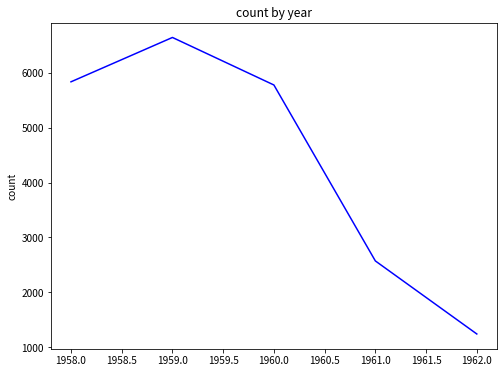

In [ ]:
# 各年度的文章數
plt.figure(figsize=(8,6))
plt.plot(df_year["year"],df_year["count"], color='blue' )
plt.ylabel('count')
plt.title('count by year')
plt.show()

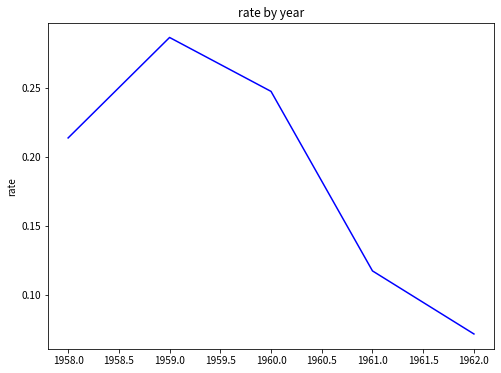

In [ ]:
# 各年度文章數佔總共文章的比例
plt.figure(figsize=(8,6))
plt.plot(df_year["year"],df_year["rate"], color='blue' )
plt.ylabel('rate')
plt.title('rate by year')
plt.show()

In [ ]:
print (title)
print ("*************************")
df_sample=df.sample(5)
for n in range(len(df_sample)):
    print(list(df_sample.filename)[n])
    print(list(df_sample.para)[n])
    print ("---------------------------")

大跃进
*************************
人民日報_19591016_4_231653
本报记者 王焕斗 黎明 以前 的 川西平原 ， 在 寂静 的 公路 上 侧耳细听 ， 来自 都江堰 的 咆哮 的 激流 ， 加上 一个个 水力 站 有 节奏 的 轰 ? 轰 ? 的 声音 ， 就 像 列车 在 那 对面 不见 人 的 晨雾 中 开动 … … 。 正当 你 听 得 入神 ， 初升 的 太阳 射出 了 光芒 ， 这时 ， 碧绿 的 稻田 、 新 修建 的 居民点 以及 在 田间 劳动 的 人群 ， 便 格外 清晰 地 展示 出来 。 这 不是 普通 的 列车 ， 这 是 奔 向 幸福生活 的 火车 ， 在 公社化 的 大道 上 飞快 地 奔驰 着 … … 进入 郫县 红光 公社 第十二 管理区 ， 穿过 第七 公共 食堂 左边 的 一片 竹林 ， 我们 到 了 丘 二娘 家里 。 她家 现有 九口 人 。 这 九口 人 在 公社 成立 以前 本来 是 两户 ： 丘 二娘 夫妇 和二 儿子 、 小女儿 是 一户 ； 大儿子 、 儿媳妇 和 他们 的 三个 小孩 又 是 一户 。 公社 成立 以后 两户 又 合成 一家 了 。 从 家庭 这种 变化 中 ， 可以 看出 人民公社 已经 在 人们 的 生活 深处 发生 着 的 微妙 影响 。 六年 前 ， 大儿子 丘立崇 结婚 了 ， 媳妇 李淑华 一心 要 摆脱 繁杂 的 家务 事情 ， 去 参加 农业社 的 工作 和 劳动 ， 闹 着 分 了 家 。 不料 她 在 几年 之内 一连 生 了 三个 娃娃 ， 那些 家里 有 老人 照料 家事 的 青年 妇女 ， 都 欢欢乐乐 地下 田 生产 ， 而 她 自己 却 只好 闷 在 家里 抱 娃娃 。 她 曾 希望 一家人 重新 合居 。 丘 二娘 对于 媳妇 是 同情 的 ， 但是 老太太 当时 担任 生产队长 ， 同样 也 害怕 沾 上 家务 、 脱离 了 田间 劳动 。 公社 一 建立 ， 吃饭 有 食堂 ， 娃娃 有 托儿所 ， 这些 老 问题 都 解决 了 ， 于是 一家人 又 合在一起 了 。 我们 到 她家 访问 那天 ， 刚 走进 宅 旁 的 竹林 ， 就 听见 一片 咯咯 咯咯 的 鸡 叫声 。 跨进 大门 一 看 ， 嗬 ！ 丘 二娘 一家 

In [ ]:
df

,year,era,filename,title,para
0,1958,195801,人民日報_19580101_1_184147,乘风破浪,人们 的 思想 常常 落后 于 实际 ， 对于 客观 形势 发展 之 快 估计不足 。 回顾...
1,1958,195801,人民日報_19580101_2_184162,为祖国高速度工业化欢呼,新华社 记者 李峰 昨天 ， 我国 已 实现 了 伟大 的 第一个 五年计划 ； 占 地球 ...
2,1958,195801,人民日報_19580101_3_184175,四川、贵州、云南、广东粮食生产连续跃进,本报讯 在 第一个 五年计划 期间 ， 我国 农业 生产 取得 了 伟大 的 成就 。 其中...
3,1958,195801,人民日報_19580103_8_184330,新年话“干劲”,葛德 元旦 ， 几个 朋友 来 玩 。 见面 之后 ， 自然 是 彼此 恭贺新禧 ， 接着 ...
4,1958,195801,人民日報_19580103_2_184275,是“差不多”还是“差得多”？江苏批判新的保守思想，要求先进地区继续前进,据 新华社讯 新华社 记者 孙振 报道 ： 江苏省 农村 在 冬季 生产 运动 中 ， 不断...
...,...,...,...,...,...
22071,1962,196212,人民日報_19621230_2_301099,朝鲜名剧《红色宣传员》在京上演董必武副主席，陈毅、陆定一副总理，韩益洙大使和韩镇燮团长等参加...,据 新华社 29 日讯 北京人民艺术剧院 今天 晚上 在 首都剧场 隆重举行 了 朝鲜 现代...
22072,1962,196212,人民日報_19621230_2_301100,中古友好公社社员隆重集会庆祝公社命名和古巴光辉节日皮诺·桑托斯大使等古巴贵宾应邀参加庆祝会,新华社 29 日讯 北京市 郊区 双桥 人民公社 今天 被 命名 为 双桥 中古 友好 人民...
22073,1962,196212,人民日報_19621230_3_301103,广东五县举行歼灭美蒋特务庆功大会广东省人民委员会和军区代表林锵云邬强等向立功民兵和群众发奖受...,新华社 广州 29 日电 广东省 人民 委员会 和 中国人民解放军 广东省 军区 ， 最近 ...
22074,1962,196212,人民日報_19621231_8_301161,陶里亚蒂在意共第十次代表大会上的总结发言（摘要）,本报讯 陶 里亚蒂 十二月 八日 在意 共 第十次 代表大会 上作 了 总结 发言 ， 摘要...


In [ ]:
# 文章字詞矩陣
ngram=(1,1)
vectorizer = TfidfVectorizer(min_df = 1,ngram_range= ngram)
dtm_tfidf = vectorizer.fit_transform(df.para) # sparse matrix

# 字詞的編號
terms=vectorizer.vocabulary_
# 字詞的 list
term_list=vectorizer.get_feature_names()

# # 轉成 array
# dtm_tfidf=dtm_tfidf.toarray() 
# # 轉成 DataFrame
# df_tfidf=pd.DataFrame(dtm_tfidf, columns=terms)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 母體LDA

In [ ]:
num_i =5 ##########################

# 方法一 SVD, LSI
# svd = TruncatedSVD(num_i, algorithm = 'arpack')   # object

# 方法二 LDA
# svd=LatentDirichletAllocation(num_i)

# 方法三 NMF,Non-negative Matrix Factorization
svd = NMF(num_i)   # 各投影值只有正值，沒有負值

# dtm_lsa = svd.fit_transform(dtm_count)  # 無加權
dtm_lsa = svd.fit_transform(dtm_tfidf)  # 加權
dtm_com = svd.fit(dtm_tfidf)  # object, not numpy array

# components
comp=dtm_com.components_
print("維度數",len(comp))
print("字詞數",len(comp[0]))

# 每個維度軸都是各字詞的線性組合，每個維度的構成
df_concept=pd.DataFrame(comp,columns= term_list)
df_concept=df_concept.transpose()

# 各維度字詞，依重要性大小排序
con=[]
sig=[]
for n in range(len(df_concept.columns)):
    # 由大至小排序
    df_order= df_concept.sort_values(by=n, ascending=False)
    con.append(list(df_order.index)[0:500])
    sig.append(list(df_order[n])[0:500])

# 轉成 dataframe 格式
df_topic=pd.DataFrame(con).T
df_topic.iloc[:20]

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


維度數 5
字詞數 216727


,0,1,2,3,4
0,我们,人民,小麦,生产,社员
1,社会主义,中国,万亩,工业,公社
2,工作,社会主义,播种,农业,食堂
3,群众,我们,各地,技术,生产
4,革命,苏联,作物,职工,生产队
5,思想,朝鲜,今年,发展,大队
6,学习,和平,地区,工厂,干部
7,他们,美帝国主义,全省,工人,人民公社
8,劳动,帝国主义,专区,企业,小队
9,教育,世界,面积,计划,工作


In [ ]:
# 印出各軸的重要字詞
for n in range(len(con)):
    print (n,con[n][:30])

0 ['我们', '社会主义', '工作', '群众', '革命', '思想', '学习', '他们', '劳动', '教育', '问题', '一个', '建设', '发展', '自己', '政治', '必须', '资产阶级', '就是', '共产主义', '文化', '同志', '学生', '改造', '没有', '理论', '科学', '我国', '这样', '社会']
1 ['人民', '中国', '社会主义', '我们', '苏联', '朝鲜', '和平', '美帝国主义', '帝国主义', '世界', '斗争', '友谊', '我国', '代表团', '国家', '美国', '团结', '两国人民', '各国', '建设', '伟大', '反对', '阵营', '侵略', '越南', '日本', '友好', '胜利', '主席', '同志']
2 ['小麦', '万亩', '播种', '各地', '作物', '今年', '地区', '全省', '专区', '面积', '增产', '早稻', '麦田', '棉花', '丰产', '油菜', '去年', '抗旱', '积肥', '亩产', '田间管理', '种植', '收割', '全县', '追肥', '丰收', '生长', '每亩', '肥料', '公社']
3 ['生产', '工业', '农业', '技术', '职工', '发展', '工厂', '工人', '企业', '计划', '设备', '提高', '产品', '完成', '运输', '今年', '增长', '车间', '月份', '支援', '需要', '钢铁', '任务', '跃进', '制造', '实现', '机械', '建设', '会议', '部门']
4 ['社员', '公社', '食堂', '生产', '生产队', '大队', '干部', '人民公社', '小队', '工作', '群众', '生活', '全社', '蔬菜', '粮食', '养猪', '领导', '组织', '劳动', '帮助', '管理区', '安排', '收入', '劳力', '他们', '参加', '妇女', '劳动力', '党委', '农村']


In [ ]:
## 各軸的識別
topics=[""]*num_i
topics[0]="革命思想"
topics[1]="社會主義國家"
topics[2]="農業改革"
topics[3]="工業改革"
topics[4]="人民公社化"

# 歷年主題占比

In [ ]:
columns=[]
for n in range(len(topics)):
    columns.append("topic"+str(n))
df_lsa=pd.DataFrame(dtm_lsa,columns=columns)
df_lsa["year"]=df.year
df_lsa["era"]=df.era
df_lsa

,topic0,topic1,topic2,topic3,topic4,year,era
0,0.045865,0.088414,0.000744,0.026586,0.000000,1958,195801
1,0.009906,0.034541,0.000000,0.032387,0.000000,1958,195801
2,0.005544,0.003275,0.044361,0.021356,0.000000,1958,195801
3,0.038968,0.025073,0.004643,0.000000,0.000000,1958,195801
4,0.010578,0.000000,0.027964,0.045739,0.014779,1958,195801
...,...,...,...,...,...,...,...
22071,0.002799,0.050045,0.000000,0.000000,0.004084,1962,196212
22072,0.000000,0.073612,0.000000,0.000000,0.029822,1962,196212
22073,0.000000,0.016590,0.000572,0.000000,0.021096,1962,196212
22074,0.052016,0.052823,0.000000,0.000000,0.000000,1962,196212


732
[0.9385970158079083, 0.061402984192091684, 0.0, 0.0, 0.0]


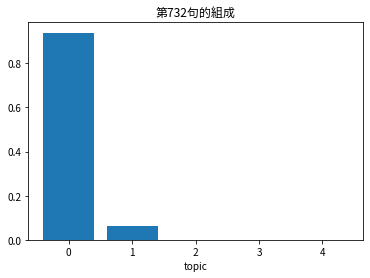

['革命思想', '社會主義國家', '農業改革', '工業改革', '人民公社化']
林聿时 资产阶级 学术思想 和 无产阶级 学术思想 的 斗争 ， 是 意识形态 上 的 阶级斗争 。 资产阶级 学术思想 只能 为 资本主义 社会 基础 服务 ， 不能 为 社会主义 社会 基础 服务 ， 这种 矛盾 ， 在 思想战线 上 的 社会主义 革命 过程 中 表现 得 最为 突出 。 但是 ， 当 它 的 性质 是 学术思想 问题 ， 属于 人民 内部矛盾 的 学术 问题 范围 时 ， 处理 这 一 矛盾 的 方法 ， 也 就 与 处理 政治 上 两条道路 斗争 的 对抗性矛盾 有所不同 。 在政治上 我们 主张 全国 人民 应该 一致 ， 不 应该 不 一致 ， 因为 遵守 宪法 ， 爱祖国 ， 拥护 共产党 的 领导 ， 拥护 社会主义 ， 这 是 全国 人民 的 义务 。 但是 ， 在思想上 不 一致 是 不可避免 的 。 这 不仅仅 在 过渡时期 由于 新旧 上层建筑 并存 ， 不同 思想体系 并存 ， 才 显出 不 一致 ， 就是 在 社会主义 社会 建成 以后 ， 甚至 在 共产主义 社会 里 ， 人 与 人 之间 也 不 可能 没有 先进 与 落后 之 分 ， 唯物 与 唯心 之 别 。 像 这样 的 不 一致 ， 企图 通过 行政命令 的 简单化 办法 强求 一致 ， 是 不会 有效 的 。 因此 ， 我们 主张 ， 在 思想 问题 上 ， 人人 都 有 发表意见 的 自由 ， 都 有 批评 和 反 批评 的 自由 。 用 自由 争辩 的 方法 ， 肃清 资产阶级 学术思想 、 克服 一切 错误思想 、 发展 真理 、 繁荣 学术 ， 这 是 我们 的 政策 。 我们 把 这 政策 ， 叫做 “ 百家争鸣 ” 。 全国 人民 欢迎 “ 百家争鸣 ” ， 因为 它 给 我国 学术界 带来 空前 活跃 的 空气 ， 它 鼓励 了 人们 独立思考 的 自由 。 资产阶级 右派 也 欢迎 “ 百家争鸣 ” ， 以为 在 这 一 政策 的 掩盖 下 ， 可以 有 贩运 其 反党 反 社会主义 私货 的 自由 。 于是 ， 始 则 装模作样 ， 谈 天气 ， 说 顾虑 ， 进行 试探 ； 继则 明目张胆 地 把 学术 文化 政策 解释 作 政治 口号 ， 呼 群聚 

In [ ]:
n=0
import random
n=random.randint(1,len(df))
print (n)
dtm_lsa[n]
rate=list(dtm_lsa[n]/np.sum(dtm_lsa[n]))
print (rate)
x=range(num_i)

fig, ax = plt.subplots(figsize=(6,4))
ax.set_title("第"+str(n)+"句的組成")
ax.set_xticks(x)
ax.set_xlabel("topic") 
ax.bar(range(num_i),rate)
plt.show()
print (topics)
print (df.para[n])

In [ ]:
# 每單位時間的各主題平均

t0=[];t1=[];t2=[];t3=[];t4=[]
month = list(sorted(set(df['era'])))
month_3 = [month[i] for i in range(0, len(month),3)]
for y in range(len(month_3)):
    df_tem=df_lsa[df_lsa["era"]==month_3[y]]
    a0=df_tem[columns[0]].mean()
    a1=df_tem[columns[1]].mean()
    a2=df_tem[columns[2]].mean()
    a3=df_tem[columns[3]].mean()
    a4=df_tem[columns[4]].mean()
    t=a0+a1+a2+a3+a4
    t0.append(a0/t)
    t1.append(a1/t)
    t2.append(a2/t)
    t3.append(a3/t)
    t4.append(a4/t)

def To_datetime(x):
  date = x
  date_form = []

  for i in date:    
      i = str(i)[:4]+'-'+str(i)[4:]
      date_form.append(i)


  # import datetime
  # dates = [datetime.datetime.strptime(x, '%Y-%m') for x in date_form]
  return date_form
month_3 = sorted(To_datetime(month_3))

month_3    

['1958-01',
 '1958-04',
 '1958-07',
 '1958-10',
 '1959-01',
 '1959-04',
 '1959-07',
 '1959-10',
 '1960-01',
 '1960-04',
 '1960-07',
 '1960-10',
 '1961-01',
 '1961-04',
 '1961-07',
 '1961-10',
 '1962-01',
 '1962-04',
 '1962-07',
 '1962-10']

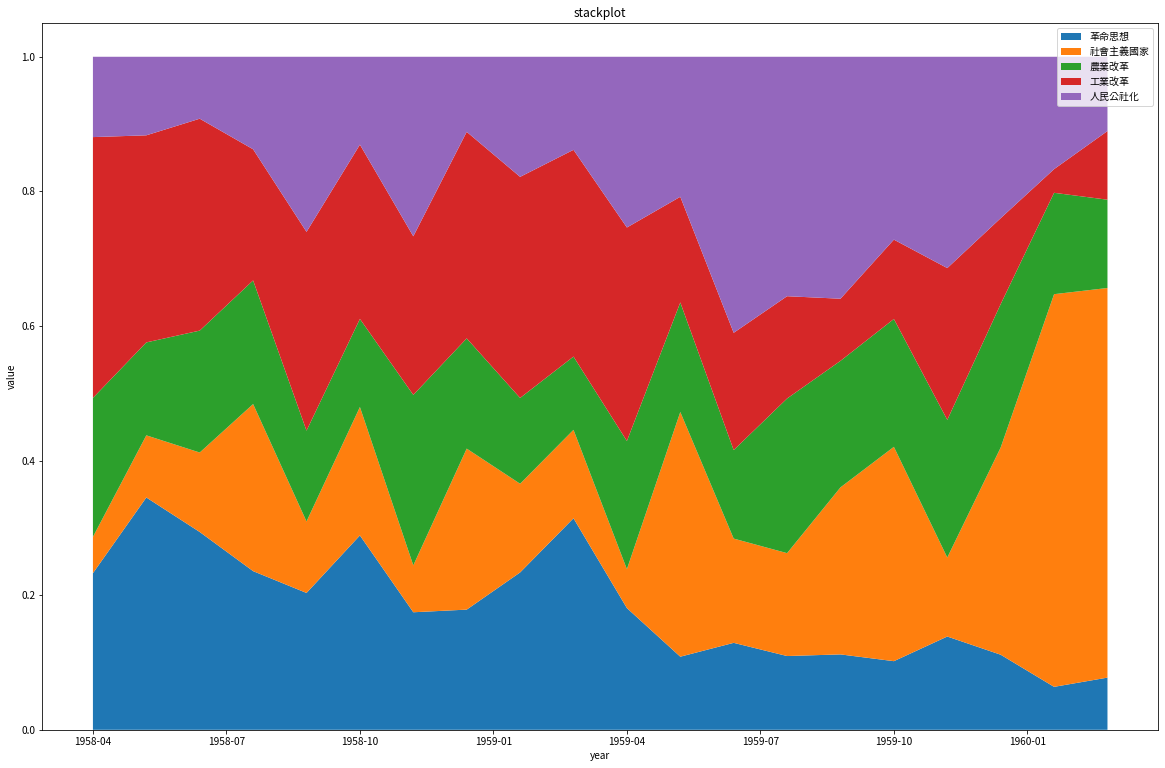

In [ ]:
# 圖區大小

fig, axe = plt.subplots(figsize = (20, 13))
# plt.figure(figsize=(30,13))  
# 繪疊加圖
plt.stackplot([i for i in range(20)], t0,t1,t2,t3,t4, labels=topics)
 # X 軸尺度
axe.set_xticklabels(month_3)

# X 軸標題
plt.xlabel('year')   
# Y 軸標題
plt.ylabel('value')   
# 圖例
plt.legend() 
# 標題
plt.title('stackplot')    
plt.show()